<a href="https://colab.research.google.com/github/slslslrhfem/AutoGeneration/blob/master/PPDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import os
import json
import pandas
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras import layers
from keras import optimizers
from keras.models import Sequential

In [ ]:
csvfilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_csv')
jsonfilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/descriptor')
midifilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_midi')

In [3]:
import pickle

"""
with open('/content/drive/My Drive/MARG/PPDDlist/csvnamelist.txt', 'wb') as f:
  pickle.dump(csvfilenames, f)
with open('/content/drive/My Drive/MARG/PPDDlist/jsonnamelist.txt', 'wb') as f:
  pickle.dump(jsonfilenames, f)
with open('/content/drive/My Drive/MARG/PPDDlist/midinamelist.txt', 'wb') as f:
  pickle.dump(midifilenames, f)
"""

"\nwith open('/content/drive/My Drive/MARG/PPDDlist/csvnamelist.txt', 'wb') as f:\n  pickle.dump(csvfilenames, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/jsonnamelist.txt', 'wb') as f:\n  pickle.dump(jsonfilenames, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/midinamelist.txt', 'wb') as f:\n  pickle.dump(midifilenames, f)\n"

In [ ]:
midifilenames=sorted(midifilenames)
csvfilenames=sorted(csvfilenames)
jsonfilenames=sorted(jsonfilenames)

In [4]:
def get_meta(filename):
  with open('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/descriptor/'+filename) as json_file:
    meta_data = json.load(json_file)
  return meta_data

In [5]:
pip install mido

     |████████████████████████████████| 61kB 2.3MB/s 


In [6]:
pip install pretty_midi

     |████████████████████████████████| 5.6MB 3.4MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-cp36-none-any.whl size=5591953 sha256=261f9027afa32ff55504a88b2bf44a5e4dc5823b3e900b4b4dfd8c22e28cc87d
  Stored in directory: /root/.cache/pip/wheels/4c/a1/c6/b5697841db1112c6e5866d75a6b6bf1bef73b874782556ba66
Successfully built pretty-midi


In [9]:
import pretty_midi
import mido
from tqdm import tqdm
import pickle
with open('/content/drive/My Drive/MARG/PPDDlist/midilist.txt', 'rb') as f:
  midilist=pickle.load(f)
with open('/content/drive/My Drive/MARG/PPDDlist/csvlist.txt', 'rb') as f2:
  csvlist=pickle.load(f2)
with open('/content/drive/My Drive/MARG/PPDDlist/jsonlist.txt', 'rb') as f3:
  jsonlist=pickle.load(f3)
with open('/content/drive/My Drive/MARG/PPDDlist/prettymidilist.txt', 'rb') as f4:
  prettymidilist=pickle.load(f4)

In [ ]:
import pretty_midi
import mido
from tqdm import tqdm
midilist=[]
csvlist=[]
jsonlist=[]
prettymidilist=[]
for filenames in tqdm(midifilenames,position=0):
  midi_path='/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_midi/'+filenames
  mid = mido.MidiFile(midi_path, clip=True)
  midilist.append(mid)
  prettymid=pretty_midi.PrettyMIDI(midi_path)
  prettymidilist.append(prettymid)

for filenames in tqdm(csvfilenames,position=0):
  csv_path='/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_csv/'+filenames
  csv = pandas.read_csv(csv_path)
  csvlist.append(csv)
for filenames in tqdm(jsonfilenames,position=0):
  jsonlist.append(get_meta(filenames))

#midifilenames와 list들의 순서는 같다고 생각하고 코드 작성

In [ ]:
"""
import pickle
with open('/content/drive/My Drive/MARG/PPDDlist/midilist.txt', 'wb') as f:
  pickle.dump(midilist, f)
with open('/content/drive/My Drive/MARG/PPDDlist/csvlist.txt', 'wb') as f:
  pickle.dump(csvlist, f)
with open('/content/drive/My Drive/MARG/PPDDlist/jsonlist.txt', 'wb') as f:
  pickle.dump(jsonlist, f)
with open('/content/drive/My Drive/MARG/PPDDlist/prettymidilist.txt', 'wb') as f:
  pickle.dump(prettymidilist, f)
"""

아래의 코드는 csv기반의 Processing을 진행한다. 
MIDI 기반의 Processing은 다음 블록에 작성되어 있으며, 둘 중 하나만 굴리면 된다.

In [ ]:
#현재 CSV dataset에 문제가 있어보인다..
bar_list=[]
one_bar_number_list=[]
starting_number_list=[]
import numpy as np
for i,csvs in enumerate(tqdm(csvlist)):
  a=np.array([list(map(float,csvs.columns))])#column에도 숫자가 들어가 있어서.. 경우에 따라 조절한다
  b=np.array(csvs.values)
  csvarray=np.concatenate((a,b),axis=0)
  if('timeSignature' not in jsonlist[i]):
    jsonlist[i]['timeSignature']=[4,4]
  one_bar_number=jsonlist[i]['timeSignature'][0]
  bar_number=(csvarray[-1][0]-csvarray[0][0])//one_bar_number+1
  bar_info_list=[]
  for i in range(int(bar_number)):
    starting_bar_time=csvarray[0][0]+i*one_bar_number
    bar_info_list.append(csvarray[np.where( (starting_bar_time<=csvarray[:,0]) & (csvarray[:,0]<starting_bar_time+one_bar_number) )])
  bar_list.append(bar_info_list)
  one_bar_number_list.append(one_bar_number)
  starting_number_list.append(csvarray[0][0])

In [ ]:
pip install pretty_midi

In [10]:
#이게 이제 input을 midi로 받는 코드.
import numpy as np
import pretty_midi
bar_list=[]
one_bar_number_list=[]
starting_number_list=[]
for i,songs in enumerate(prettymidilist[:2000]):#곡마다. Ram 관련 이슈로 2000으로 줄인다.
  for instrument in songs.instruments: #2. 어차피 instrument하나
    csvarray=[]
    for note in instrument.notes: #3
      row=[note.start*2, note.pitch, note.pitch, (note.end - note.start)*2, 0] #*2를 해줘야 제대로 하나의 bar가 하나의 단위가 된다.
      csvarray.append(row)
  csvarray=np.array(csvarray)
  if('timeSignature' not in jsonlist[i]):
    jsonlist[i]['timeSignature']=[4,4]
  one_bar_number=jsonlist[i]['timeSignature'][0]
  bar_number=(csvarray[-1][0]-csvarray[0][0])//one_bar_number+1
  bar_info_list=[]
  for i in range(int(bar_number)):
    starting_bar_time=csvarray[0][0]+i*one_bar_number
    bar_info_list.append(csvarray[np.where( (starting_bar_time<=csvarray[:,0]) & (csvarray[:,0]<starting_bar_time+one_bar_number) )])
  bar_list.append(bar_info_list)
  one_bar_number_list.append(one_bar_number)
  starting_number_list.append(csvarray[0][0])

In [ ]:
"""
for bars in bar_list:
  #print(len(bars))결과 보면 다 다르다. 따라서 정해진 Shape가 없음
  for matrix in bars:
    for lists in matrix:
      if (lists[1]<24):
        print(lists[1])#Small Data기준 95가 최대, 25가 Minimum. Big Data로 바꾸면 추가적인 조절 가능할듯
"""

In [ ]:
#print(bar_list[0][0])#1번째 곡의 1번째 bar.

[[ 0.  48.  48.   0.5  0. ]
 [ 0.5 55.  55.   0.5  0. ]
 [ 1.5 52.  52.   0.5  0. ]
 [ 2.  50.  50.   0.5  0. ]
 [ 2.5 48.  48.   0.5  0. ]
 [ 3.  46.  46.   1.   0. ]
 [ 4.  53.  53.   0.5  0. ]]


In [ ]:
#print(bar_info_list)# bar info list가 bar마다 csv내용들 담겨져 있는거다.

In [11]:
def nearest_time(time,minimum_size):
  #혹시나 값이 조금 벗어나는 엇박 음을 가까운 최소단위로 Shifting한다.
  #다만 엇박 관련 Skill Detecting을 따로 고려할시 코드를 수정할 수 있다.
  num_to_multiply=time/minimum_size
  num_to_multiply=int(num_to_multiply)
  left_time=num_to_multiply*minimum_size
  right_time=left_time+minimum_size
  if (time-left_time>=right_time-time):
    return right_time
  return left_time
def bar_to_matrix1(bar,one_bar_number,starting_number,i):
  #그냥 점만 남긴다.
  #8/6박이면 one_bar_number가 8이다. 그러면 바 1개당 무조건 12개 처리하는거로 한다.
  #lists[0]은 시간, lists[1]은 Note 높이, lists[3]은 Duration. 
  init=np.zeros((112,96))#112는 Note의 수(감으로 써둠.. 나중에 전체 데이터로 할때 수정 가능성 있음 그런데 Shift를 잘 이용하면 96*96도 가능해보임.)
  minimum_size=one_bar_number/96
  zero_time=starting_number+one_bar_number*i    
  for j,lists in enumerate(bar):
    
    point=int((nearest_time(lists[0],minimum_size)-zero_time)/minimum_size)
    if(point==96):
      point=92
    
    init[111-int(lists[1])][point]=lists[3]#111-int(list[1])형태로 해야 직관적인 PianoRoll 형태가 ㅏ온다.
  return init
def bar_to_matrix2(bar,one_bar_number,starting_number,i):
  #Duration에 따라 Ploting한다.
  #8/6박이면 one_bar_number가 8이다. 그러면 바 1개당 무조건 12개 처리하는거로 한다.

  init=np.zeros((112,96))#112는 Note의 수(감으로 써둠.. 나중에 전체 데이터로 할때 수정 가능성 있음 그런데 Shift를 잘 이용하면 96*96도 가능해보임.)
  minimum_size=one_bar_number/96
  zero_time=starting_number+one_bar_number*i    
  for j,lists in enumerate(bar):
    #lists[0]은 시간, lists[1]은 Note 높이, lists[3]은 Duration. 
    point=int((nearest_time(lists[0],minimum_size)-zero_time)/minimum_size)
    length=int(round(lists[3]/minimum_size))
    if (length>3):
      length=length-1#여러번 두두두 치는 음을 구별하기 위함
    if (point+length>95):
      length=95-point # 한 음이 2Bar에 걸쳐있는 경우 Bar 뒤쪽의 음을 무시한다.
    init[111-int(lists[1])][point:point+length]+=1
  return init

def bar_to_matrix3(bar,one_bar_number,starting_number,i):
  #일단 3은 쓰지 맙시다
  #Duration에 따라 Plot함과 동시에 가장 높은음과 낮은음을 고려해서 실제 DAW와 같이 Plot한다.
  #8/6박이면 one_bar_number가 8이다. 그러면 바 1개당 무조건 12개 처리하는거로 한다.
  init=np.zeros((112,96))#112는 Note의 수(감으로 써둠.. 나중에 전체 데이터로 할때 수정 가능성 있음 그런데 Shift를 잘 이용하면 96*96도 가능해보임.)
  minimum_size=one_bar_number/96
  zero_time=starting_number+one_bar_number*i    
  for j,lists in enumerate(bar):
    #lists[0]은 시간, lists[1]은 Note 높이, lists[3]은 Duration. 
    point=int((nearest_time(lists[0],minimum_size)-zero_time)/minimum_size)
    init[int(lists[1])][point]=lists[3]
  return init

In [12]:
import copy
#bar_list to bar_matrix_list
#bar_matrix_list=copy.deepcopy(bar_list)
bar_matrix_list2=copy.deepcopy(bar_list)
for i,songs in enumerate(bar_matrix_list2):
  for j,bar in enumerate(songs):
    #print(one_bar_number_list[i],starting_number_list[i])
    #matrix=bar_to_matrix1(bar,one_bar_number_list[i],starting_number_list[i],j)
    matrix2=bar_to_matrix2(bar,one_bar_number_list[i],starting_number_list[i],j)
    #bar_matrix_list[i][j]=matrix
    bar_matrix_list2[i][j]=matrix2

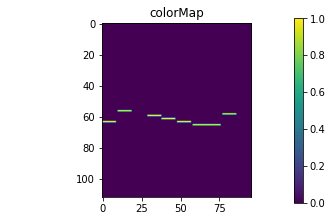

In [13]:
#print(bar_list[0][0],bar_matrix_list[0][0],bar_matrix_list2[0][0]) 큰 의미 없다
import numpy as np
import matplotlib.pyplot as plt

H = bar_matrix_list2[0][0]

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

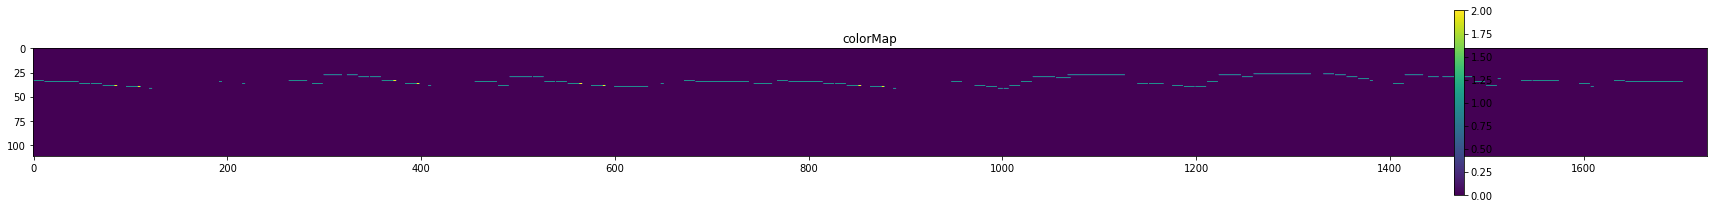

In [14]:
tot=bar_matrix_list2[2]
H=bar_matrix_list2[2][0]
for i in range(1,len(tot)):
  a=bar_matrix_list2[2][i]
  H=np.concatenate((H,a),axis=1)
  
fig = plt.figure(figsize=(30, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()
#위 for문 없이 돌리면 1 bar만 나옴

In [15]:
def bar_to_contour(bar,one_bar_number,starting_number,j):
  contour=[]
  pitch_change_list=[]
  duration_list=[]
  real_pitch_list=[]
  real_time_list=[]
  real_duration_list=[]
  now_pitch=1000
  first_time=starting_number+one_bar_number*j
  a=0
  for lists in bar:
    if(a!=0): 
      real_time_list.append(lists[0]-now_rhythm)
    now_rhythm=lists[0]
    a+=1
    if (first_time*1.001<lists[0]):#smoothing for case like first time=5.00001, lists[0]=5.0000..
      resting_time=lists[0]-first_time
      duration_list.append(resting_time)
      first_time=lists[0]
      pitch_change_list.append('Rest')
    if (now_pitch==1000):
      pitch_change_list.append('Starting_Point')
      real_pitch_list.append('Starting_Point')
      real_duration_list.append(lists[3])
      duration_list.append(lists[3])
      first_time=first_time+lists[3]
      now_pitch=lists[1]
      a+=1
    else:
      pitch_change=lists[1]-now_pitch
      pitch_change_list.append(str(pitch_change))#나중에 int로 바꿔쓸 것. 자료형 터지는거 때문에 우선 스트링.
      duration_list.append(lists[3])
      real_duration_list.append(lists[3])
      first_time=first_time+lists[3]
      now_pitch=lists[1]
      real_pitch_list.append(str(pitch_change))
  if (first_time*1.001<starting_number+one_bar_number*(j+1)):
    pitch_change_list.append('Rest')#마지막 Rest
    duration_list.append(starting_number+one_bar_number*(j+1)-first_time)
  if(len(bar)!=0):
    real_time_list.append(starting_number+one_bar_number*(j+1)-now_rhythm)
  contour.append(pitch_change_list)
  contour.append(duration_list)
  contour.append(real_pitch_list)
  contour.append(real_time_list)
  contour.append(real_duration_list)
  #something
  return contour



Plot에서 중요한것은 Y-Axis의 0~112의 숫자가 Note의 반대 성향을 가진다는 것이다.(숫자가 커질수록 Note의 높이가 낮아진다.) 이는 PianoRoll을 이미지 처럼 사용하는 과정에서, 직관적인 학습이 가능하도록 이와 같이 구현한 것이다.

In [16]:
bar_contour_list=copy.deepcopy(bar_list)
for i,songs in enumerate(bar_list):
  for j,bar in enumerate(songs):
    contour=bar_to_contour(bar,one_bar_number_list[i],starting_number_list[i],j)
    bar_contour_list[i][j]=contour


bar_contour_list : 중간과정
bar_matrix_list2 : 아마 학습에 사용하게 될 Matrix의 List
bar_label_list : 학습에 사용하게 될 Label의 List

In [17]:
print(bar_contour_list[0][0])


[['Starting_Point', '7.0', 'Rest', '-3.0', '-2.0', '-2.0', '-2.0', '7.0', 'Rest'], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5], ['Starting_Point', '7.0', '-3.0', '-2.0', '-2.0', '-2.0', '7.0'], [0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0], [0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5]]


In [18]:
for contours in bar_contour_list[11]:
  print(contours)
print(jsonlist[11])

[['Starting_Point', 'Rest', '-8.0', '3.0', 'Rest', '5.0', 'Rest'], [0.3333333333333333, 0.16666666666666669, 0.25, 0.16666666666666663, 0.08333333333333337, 0.33333333333333326, 2.666666666666667], ['Starting_Point', '-8.0', '3.0', '5.0'], [0.5, 0.25, 0.25, 3.0], [0.3333333333333333, 0.25, 0.16666666666666663, 0.33333333333333326]]
[['Rest', 'Starting_Point', '1.0'], [3.5, 0.25, 0.33333333333333215], ['Starting_Point', '1.0'], [0.25, 0.25], [0.25, 0.33333333333333215]]
[['Starting_Point', 'Rest'], [0.25, 3.75], ['Starting_Point'], [4.0], [0.25]]
[['Rest'], [4.0], [], [], []]
[['Starting_Point', '-9.0', '1.0', '8.0', '-12.0', 'Rest'], [0.25, 0.25, 0.33333333333333215, 0.25, 0.33333333333333215, 2.5833333333333357], ['Starting_Point', '-9.0', '1.0', '8.0', '-12.0'], [0.25, 0.25, 0.25, 0.25, 3.0], [0.25, 0.25, 0.33333333333333215, 0.25, 0.33333333333333215]]
[['Rest'], [4.0], [], [], []]
[['Starting_Point', '-9.0', '1.0', '3.0', 'Rest', '5.0', 'Rest'], [0.25, 0.25, 0.25, 0.166666666666664

In [19]:
#최대한 많고 깔끔한 조건문을 사용하여 Skill들을 정의해볼 것. Multilabel Classification의 가능성이 있다.
"""
Skill들의 음악학적인 특성 & 계산적인 특성을 적는 곳
'resting' : 포함하는 음이 0 또는 1개인 경우 resting으로 정의. 다른 Skill들은 겹칠 수 있으나 이 skill이 Label될 경우 그냥 resting 고정이다.
즉, Skilling Labeling은 'resting'이 아닌 경우에 진행된다.
'repeating' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 전부 같은 음일 경우 repeating으로 정의
'up_steping' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 steping up 또는 같은 음, 즉 반음기준 3Note 이하로 상승하는 형태일 경우 up_steping으로 정의
'down_steping' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 steping down 또는 같은 음, 즉 반음기준 3Note 이하로 하강하는 형태일 경우 down_steping으로 정의
'up_leaping' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 leaping up, 즉 반음기준 3Note 이상으로 상승하는 형태일 경우 up_leaping으로 정의
'down_leaping' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 leaping down, 즉 반음기준 3Note 이상으로 하강하는 형태일 경우 down_leaping으로 정의
3Note에서 겹치는게 맞다. Multilabel Classification을 고안 중이기 때문.
'steping_twisting' : 음이 4개 이상이고, n개를 제외한 경우가 2Note 이하의 상승과 하강을 반복하는 형태일 경우 steping_twisting으로 정의
'leaping_twisting' : 음이 4개 이상이고, n개를 제외한 경우가 3Note 이상의 상승과 하강을 반복하는 형태일 경우 leaping_twisting으로 정의
'fast_rhythm' : 1 bar 내에 음이 9개 이상인 경우 fast_rhythm으로 정의.
'One_rhythm' :  모든 음이 지닌 연주의 real_time, 즉 음이 울리고 다음 음이 나올때 까지의 시간이 같으면 One_rhythm으로 정의
'triplet' : real_time기반해서 triplet이 존재하면(Note 3개) triplet으로 정의
'Staccato' : real_Duration_Time 기반해서 n% 이상의 음의 Duration이 0.16667(최소단위*4임)보다 작으면(매우 짧으면) Staccato로 정의
'continuing_rhythm' : pitch_change_list에서 'Rest'의 비율이 25퍼센트 이하면 continuing_rhythm으로 정의
첫 음 제외 실 음의 75%를 기준으로 잡는다.
5개 이상의 음이 있다면 1개를 제외하고 전부 조건에 맞아야하고,
9개 이상의 음이 있다면 2개를 제외하고 전부 조건에 맞아야하고...
4개 이하는 다 맞아야 한다.
ex) CDEF -> up_steping, CDED -> None, CDEFD-> up_steping.
다만 Leaping에 대해서는 많이 후해질 것 같다. 거의 50%가까이..?  
"""

"""
예시로는..
contour[0] = ['Starting_Point', 'Rest', '4.0', '1.0', 'Rest', '2.0', 'Rest', '-7.0', 'Rest'] Note pitch의 변화를 쉼표를 포함하여 의미한다.
contour[1] = [0.83333, 0.16666999999999987, 0.5, 0.33333, 0.16666999999999987, 0.8333299999999999, 0.16666999999999987, 0.75, 0.25] Duration을 쉼표를 포함하여 의미한다.
contour[2] = ['Starting_Point', '4.0', '1.0', '2.0', '-7.0'] note pitch의 변화를 의미한다.
contour[3] = [1.0, 0.5, 0.5, 1.0, 1.0] 한 음의 실 연주시간을 의미한다.(다음 음이 나올때 까지의 시간)
contour[4] = [0.83333, 0.5, 0.33333, 0.8333299999999999, 0.75] Duration을 의미한다.
"""
def is_repeating(contour_list,exception_range):
  boolean_repeating=0
  non_repeat=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if(elements != '0.0'):
        non_repeat+=1
  if (non_repeat<=exception_range):
    boolean_repeating=1
  return boolean_repeating

def is_up_steping(contour_list,exception_range):
  balancing_param=1
  boolean_up_steping=0
  non_step_up=0
  now_step_up=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (now_step_up==0):
        if (float(elements)<0.5 or float(elements)>4.5):
          now_step_up=0
          non_step_up+=1
        else:
          now_step_up=1
      else:
        if(float(elements)<-0.5 or float(elements)>4.5):
          now_step_up=0
          non_step_up+=1
        else:
          now_step_up=1
  if(non_step_up<=exception_range+balancing_param):
    boolean_up_steping=1
  return boolean_up_steping

def is_down_steping(contour_list,exception_range):
  boolean_down_steping=0
  balancing_param=0
  non_step_down=0
  now_step_down=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (now_step_down==0):
        if (float(elements)>-0.5 or float(elements)<-4.5):
          now_step_down=0
          non_step_down+=1
        else:
          now_step_down=1
      else:
        if(float(elements)>0.5 or float(elements)<-4.5):
          now_step_down=0
          non_step_down+=1
        else:
          now_step_down=1
  if(non_step_down<=exception_range+balancing_param):
    boolean_down_steping=1
  return boolean_down_steping

def is_up_leaping(contour_list,exception_range):
  boolean_up_leaping=0
  non_leap_up=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (float(elements)<3.5):
        non_leap_up+=1
  if (non_leap_up<=exception_range+1):
    boolean_up_leaping=1
  return boolean_up_leaping

def is_down_leaping(contour_list,exception_range):
  boolean_down_leaping=0
  non_leap_down=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (float(elements)>-3.5):
        non_leap_down+=1
  if (non_leap_down<=exception_range+1):
    boolean_down_leaping=1
  return boolean_down_leaping

def is_leaping_twisting(contour_list,exception_range):
  boolean_leaping_twisting=0
  non_leap_twist=0
  balancing_param=1
  now_dir=0 #1for up, -1 for down
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (now_dir==0):
        if (3.5<float(elements)):
          now_dir=1
        elif (float(elements) <-3.5):
          now_dir=-1
        else:
          non_leap_twist+=1
      elif (now_dir==1):
        if (float(elements) <-3.5):
          now_dir=-1
        else:
          now_dir=0
          non_leap_twist+=1
      elif (now_dir==-1):
        if (3.5<float(elements)):
          now_dir=1
        else:
          now_dir=0
          non_leap_twist+=1
  if(non_leap_twist<=exception_range+balancing_param):
    boolean_leaping_twisting=1
  return boolean_leaping_twisting

def is_steping_twisting(contour_list,exception_range):
  boolean_steping_twisting=0
  non_step_twist=0
  now_dir=0 #1for up, -1 for down
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (now_dir==0):
        if (0<float(elements) and float(elements) <2.5):
          now_dir=1
        elif (-2.5<float(elements) and float(elements) <0):
          now_dir=-1
        else:
          non_step_twist+=1
      elif (now_dir==1):
        if (-2.5<float(elements) and float(elements) <0):
          now_dir=-1
        else:
          now_dir=0
          non_step_twist+=1
      elif (now_dir==-1):
        if (0<float(elements) and float(elements) <2.5):
          now_dir=1
        else:
          now_dir=0
          non_step_twist+=1
  if(non_step_twist<=exception_range):
    boolean_steping_twisting=1
  return boolean_steping_twisting

def is_one_rhythm(contour_list,exception_range):
  boolean_one_rhythm=0
  non_same_rhythm=0

  first_rhythm=contour_list[0]
  for rhythms in contour_list:
    if (rhythms != first_rhythm):
      non_same_rhythm=1
  boolean_one_rhythm=1-non_same_rhythm
  return boolean_one_rhythm

def is_triplet(contour_list,exception_range):
  boolean_triplet=0
  now_triplet=0
  for rhythms in contour_list:
    rhythms=float(rhythms)
    if (rhythms%0.015625>0.001):
      if(now_triplet==1):
        boolean_triplet=1
      now_triplet+=1
    else:
      now_triplet=0
      
  return boolean_triplet

def is_staccato(contour_list,exception_range):
  boolean_staccato=0
  ranges=len(contour_list)//2
  staccato_num=0
  for times in contour_list:
    if (times<0.2):
      staccato_num+=1
  if (staccato_num>=ranges):
    boolean_staccato=1
  return boolean_staccato

def is_continuing_rhythm(contour_list):
  boolean_continuing_rhythm=0
  length=len(contour_list)
  rest_num=0
  for elements in contour_list:
    if (elements=='Rest'):
      rest_num+=1
  if (rest_num<=0.5):
    boolean_continuing_rhythm=1
  return boolean_continuing_rhythm

def contour_to_label(contour):
  labels=[]
  totnum=len(contour[2]) #실 음의 갯수이다.
  exception_range=(totnum-1)//4
  exception_range2=(totnum-1)//3
  if (len(contour[2])<2.5):
    labels.append('resting')
    return labels
  else:
    if (is_repeating(contour[2],exception_range2)):
      labels.append('repeating')

    if (is_up_steping(contour[2],exception_range)):
      if (len(contour[2])>3):
        labels.append('up_steping')

    if (is_down_steping(contour[2],exception_range)):
      if (len(contour[2])>3):
        labels.append('down_steping')

    if (is_up_leaping(contour[2],exception_range2)):
      labels.append('up_leaping')
    
    if (is_down_leaping(contour[2],exception_range2)):
      labels.append('down_leaping')

    if (is_steping_twisting(contour[2],exception_range2)):
      if (len(contour[2])>3):
        labels.append('steping_twisting')

    if (is_leaping_twisting(contour[2],exception_range2)):
      if (len(contour[2])>3):
        labels.append('leaping_twisting')

    if (len(contour[2])>8.5):
      labels.append('fast_rhythm')

    if (is_one_rhythm(contour[3],exception_range)):
      labels.append('One_rhythm')

    if (is_triplet(contour[3],exception_range2)):
      labels.append('triplet')

    if (is_staccato(contour[4],exception_range2)):
      labels.append('staccato')  

    if (is_continuing_rhythm(contour[0])):
      labels.append('continuing_rhythm')  

  """
  if (len(labels)==0):
    labels.append('no skills')
    meanless.
  """

  return labels

In [20]:
bar_label_list=copy.deepcopy(bar_contour_list)
for i,songs in enumerate(bar_contour_list):
  for j,contour in enumerate(songs):
    label=contour_to_label(contour) 
    bar_label_list[i][j]=label

In [21]:
for j in range(len(bar_label_list[0])):
  print(bar_label_list[0][j])
  print(bar_contour_list[0][j])

[]
[['Starting_Point', '7.0', 'Rest', '-3.0', '-2.0', '-2.0', '-2.0', '7.0', 'Rest'], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5], ['Starting_Point', '7.0', '-3.0', '-2.0', '-2.0', '-2.0', '7.0'], [0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0], [0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5]]
[]
[['Starting_Point', '7.0', 'Rest', '-3.0', '-2.0', '-2.0', '-2.0', '7.0', 'Rest'], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5], ['Starting_Point', '7.0', '-3.0', '-2.0', '-2.0', '-2.0', '7.0'], [0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0], [0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5]]
['repeating']
[['Starting_Point', '7.0', 'Rest', '-7.0', '0.0', '0.0', '0.0', '0.0'], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0], ['Starting_Point', '7.0', '-7.0', '0.0', '0.0', '0.0', '0.0'], [0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0], [0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0]]
['leaping_twisting', 'continuing_rhythm']
[['Starting_Point', '7.0', '-7.0', '4.0', '3.0', '3.0', '-5.0'], [0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0], ['Starting_Point', '7.0', '-7.0', '4.0', '3.0

[['Starting_Point', '7.0', 'Rest', '-3.0', '-2.0', '-2.0', '-2.0', '7.0', 'Rest'], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 0.5], ['Starting_Point', '7.0', '-3.0', '-2.0', '-2.0', '-2.0', '7.0'], [0.5, 1.0, 0.5, 0.5, 0.5, 1.0, 1.0], [0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5]]
[]
[[ 0.  48.  48.   0.5  0. ]
 [ 0.5 55.  55.   0.5  0. ]
 [ 1.5 52.  52.   0.5  0. ]
 [ 2.  50.  50.   0.5  0. ]
 [ 2.5 48.  48.   0.5  0. ]
 [ 3.  46.  46.   1.   0. ]
 [ 4.  53.  53.   0.5  0. ]]


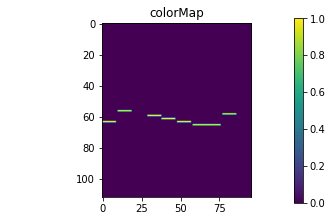

In [22]:
#Summary
print(bar_contour_list[0][0])
print(bar_label_list[0][0])
print(bar_list[0][0])

H=bar_matrix_list2[0][0]
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()
#위 for문 없이 돌리면 1 bar만 나옴
#matrix_list2를 CNN하되 라벨을 label로 가져가면 될듯 bar_label_list[i][j]는 i번째곡의 j번째 bar를 의미하고, 나머지도 같다.

In [23]:
all_matrix=[]
all_labels=[]
for songs in bar_label_list:
  for label in songs:
    label=np.array(label)
    all_labels.append(label)
bar_label_list=[]#램 터짐
for songs in bar_matrix_list2:
  for matrix in songs:
    matrix=matrix.reshape(112,96,1)
    all_matrix.append(matrix)
bar_matrix_list2=[]#이거도


In [24]:
print(len(all_matrix),len(all_labels))

34889 34889


In [25]:
import keras.backend.tensorflow_backend as tfback
from tensorflow.python.client import device_lib
def _get_available_gpus():
  if tfback._LOCAL_DEVICES is None:
    devices = device_lib.list_local_devices()
    tfback._LOCAL_DEVICES = [x.name for x in devices]
  return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]
tfback._get_available_gpus = _get_available_gpus
tfback._get_available_gpus()

ModuleNotFoundError: ignored

In [26]:
from sklearn.preprocessing import MultiLabelBinarizer
train_matrix=np.array(all_matrix[:27000])
train_label=np.array(all_labels[:27000])

In [27]:
def set_labels():
  labels=[]
  label_tuple=[]
  skills_pitch=['repeating','up_steping','down_steping','up_leaping','down_leaping','steping_twisting','leaping_twisting','dummy']
  skills_timing=['resting','fast_rhythm','dummy']
  skills_triplet=['triplet','dummy']
  skills_one_rhythm=['One_rhythm','dummy']
  skills_staccato=['staccato','continuing_rhythm','dummy']
  for pitch in skills_pitch:
    for timing in skills_timing:
      for triplet in skills_triplet:
        for one_rhythm in skills_one_rhythm:
          for staccato in skills_staccato:
            label_tuple=[]
            if pitch is not 'dummy':
              label_tuple.append(pitch)
            if timing is not 'dummy':
              label_tuple.append(timing)
            if triplet is not 'dummy':
              label_tuple.append(triplet)
            if one_rhythm is not 'dummy':
              label_tuple.append(one_rhythm)
            if staccato is not 'dummy':
              label_tuple.append(staccato)
            label_tuple=tuple(label_tuple)
            labels.append(label_tuple)
  return labels

In [28]:
label=set_labels()
print(label)

[('repeating', 'resting', 'triplet', 'One_rhythm', 'staccato'), ('repeating', 'resting', 'triplet', 'One_rhythm', 'continuing_rhythm'), ('repeating', 'resting', 'triplet', 'One_rhythm'), ('repeating', 'resting', 'triplet', 'staccato'), ('repeating', 'resting', 'triplet', 'continuing_rhythm'), ('repeating', 'resting', 'triplet'), ('repeating', 'resting', 'One_rhythm', 'staccato'), ('repeating', 'resting', 'One_rhythm', 'continuing_rhythm'), ('repeating', 'resting', 'One_rhythm'), ('repeating', 'resting', 'staccato'), ('repeating', 'resting', 'continuing_rhythm'), ('repeating', 'resting'), ('repeating', 'fast_rhythm', 'triplet', 'One_rhythm', 'staccato'), ('repeating', 'fast_rhythm', 'triplet', 'One_rhythm', 'continuing_rhythm'), ('repeating', 'fast_rhythm', 'triplet', 'One_rhythm'), ('repeating', 'fast_rhythm', 'triplet', 'staccato'), ('repeating', 'fast_rhythm', 'triplet', 'continuing_rhythm'), ('repeating', 'fast_rhythm', 'triplet'), ('repeating', 'fast_rhythm', 'One_rhythm', 'staccat

In [29]:
valid_matrix=np.array(all_matrix[27000:34000])
valid_label=np.array(all_labels[27000:34000])
test_matrix=np.array(all_matrix[34000:])
test_label=np.array(all_labels[34000:])#어쩌면 쓸수도?
mlb=MultiLabelBinarizer()
labels=set_labels()
mlb.fit(labels)
train_label2=mlb.transform(train_label)
valid_label2=mlb.transform(valid_label)
test_label2=mlb.transform(test_label)


In [30]:
all_matrix=[]
all_labels=[]

In [31]:
print(train_matrix.shape)
print(train_label2)
print(valid_matrix.shape)

(27000, 112, 96, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]]
(7000, 112, 96, 1)


In [34]:
import keras.applications
from keras import regularizers
from keras.applications import VGG16
from keras.applications import resnet50
from keras import layers
def residual_block(filter, input, add=True):
    layer_1 = keras.layers.Conv2D(filters=filter//4, kernel_size=(1, 1), data_format="channels_first")(input)
    layer_2 = keras.layers.Conv2D(filters=filter//4, kernel_size=(3, 3), padding='same', data_format="channels_first", kernel_regularizer=keras.regularizers.l2(0.001))(layer_1)
    layer_2 = keras.layers.BatchNormalization()(layer_2)
    layer_2 = keras.layers.ReLU()(layer_2)
    layer_3 = keras.layers.Conv2D(filters=filter, kernel_size=(1, 1), data_format="channels_first")(layer_2)
    layer_3 = keras.layers.BatchNormalization()(layer_3)
    if add:
        layer_3 = keras.layers.add([input, layer_3])
    layer_3 = keras.layers.ReLU()(layer_3)
    return layer_3
def make_model():
  with tf.device('/gpu:0'):
    input_layer = keras.Input(shape=(112, 96, 1))
    layer_1 = keras.layers.Conv2D(filters=64, kernel_size=(7, 7), padding='same', data_format="channels_first")(input_layer)
    block_1 = residual_block(64, layer_1)
    block_2 = residual_block(64, block_1)
    #block_3 = residual_block(64, block_2)
    pooling_layer = keras.layers.MaxPool2D((2, 2),padding='same', data_format="channels_first")(block_1)
    block_4 = residual_block(128, pooling_layer, add=False)
    block_5 = residual_block(128, block_4)
    #block_6 = residual_block(128, block_5)
    pooling_layer2 = keras.layers.MaxPool2D(padding='same',pool_size=(2, 2), data_format="channels_first")(block_4)
    block_7 = residual_block(256, pooling_layer2, add=False)
    block_8 = residual_block(256, block_7)
    block_9 = residual_block(256, block_8)
    #pooling_layer4 = keras.layers.MaxPool2D(pool_size=(2, 2), data_format="channels_first")(block_7)
    #block_10 = residual_block(256, pooling_layer4)
    #block_11 = residual_block(512, block_10)
    pooling_layer3 = keras.layers.AvgPool2D(padding='same',pool_size=(8, 8), data_format="channels_first")(block_7)
    last_layer = keras.layers.Flatten()(pooling_layer3)
    last_layer = keras.layers.Dropout(0.4)(last_layer)
    last_layer = keras.layers.Dense(13, activation="sigmoid")(last_layer)
    return keras.models.Model(inputs=input_layer, outputs=last_layer)
def make_classifier():
  with tf.device('/gpu:0'):
    classifier = Sequential()
    classifier.add(layers.Conv2D(128, kernel_size=(5, 5), strides=(1, 1), padding='same',
                  activation='relu',
                  input_shape=(112,96,1)))
    classifier.add(layers.BatchNormalization())
    classifier.add(layers.advanced_activations.LeakyReLU(alpha=0.01))
    classifier.add(layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
    classifier.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    classifier.add(layers.Conv2D(256, (2, 2), padding='same'))
    classifier.add(layers.advanced_activations.LeakyReLU(alpha=0.01))
    classifier.add(layers.MaxPooling2D(pool_size=(2, 2)))
    classifier.add(layers.Flatten())
    classifier.add(layers.Dropout(0.25))
    classifier.add(Dense(14, activation='sigmoid'))
  return classifier

In [35]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
model_path = '/content/drive/My Drive/models/' + 'deeperppddbest.h5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_accuracy',
                                verbose=1, save_best_only=True)
callbacks = [cb_checkpoint]

In [36]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score


In [37]:
classifier=make_model()
classifier.compile(loss=keras.losses.BinaryCrossentropy(
      from_logits=False, label_smoothing=0.1, 
      name='binary_crossentropy'
  ), optimizer='adam', metrics=['accuracy',recall,precision,f1score])

hist=classifier.fit(
      train_matrix,train_label2,batch_size=256,
      epochs=100,
      validation_data=(valid_matrix,valid_label2),
      callbacks=callbacks,
  )

#실제 학습

'\nhist=classifier.fit(\n      train_matrix,train_label2,batch_size=256,\n      epochs=100,\n      validation_data=(valid_matrix,valid_label2),\n      callbacks=callbacks,\n  )\n'

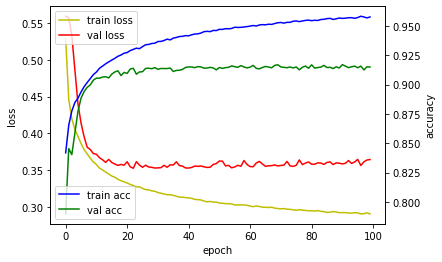

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

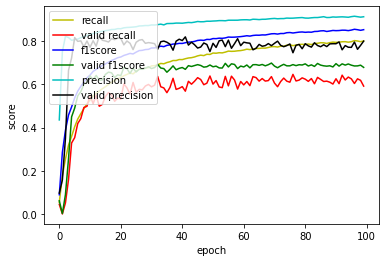

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, recall_ax = plt.subplots()


recall_ax.plot(hist.history['recall'], 'y', label='recall')
recall_ax.plot(hist.history['val_recall'], 'r', label='valid recall')

recall_ax.plot(hist.history['f1score'], 'b', label='f1score')
recall_ax.plot(hist.history['val_f1score'], 'g', label='valid f1score')

recall_ax.plot(hist.history['precision'], 'c', label='precision')
recall_ax.plot(hist.history['val_precision'], 'k', label='valid precision')

recall_ax.set_xlabel('epoch')
recall_ax.set_ylabel('score')

recall_ax.legend(loc='upper left')

plt.show()

In [38]:
  classifier.load_weights("/content/drive/My Drive/models/deeperppddbest.h5")
  testresult=classifier.predict(test_matrix)

In [39]:
print(testresult)

[[1.1898383e-02 3.2762207e-02 5.3274962e-03 ... 9.9936229e-01
  2.1745802e-03 9.0409935e-01]
 [4.2967041e-04 1.1068092e-01 1.0350343e-02 ... 9.9987423e-01
  8.7242248e-03 7.5008482e-01]
 [1.4504819e-02 8.3241053e-02 6.1874062e-02 ... 9.7104681e-01
  1.2681885e-01 1.6989462e-01]
 ...
 [5.9734231e-01 1.4315343e-01 7.3110431e-02 ... 4.1068826e-02
  8.9478359e-02 8.8708192e-02]
 [6.6203195e-01 6.6474997e-02 7.5187582e-01 ... 4.1182581e-02
  2.6441666e-01 1.1596277e-01]
 [2.4489347e-02 5.9373889e-02 5.3101275e-02 ... 5.3041283e-02
  5.4343663e-02 1.1937305e-01]]


In [40]:
classnum={}
testnum={}
resultmat=[]
for i in range(len(testresult)):
  eval_result=[0 for i in range(13)]
  class_num=np.count_nonzero(test_label2[i]==1)+1
  classidx=(-testresult[i]).argsort()[:class_num]
  for j in classidx:
    eval_result[j]=1
  resultmat.append(eval_result)
  test_result2=copy.deepcopy(testresult)
  test_result2[np.where(test_result2>0.30)]=1
  test_result2[np.where(test_result2<=0.30)]=0
resultmat=np.array(resultmat)
testidx=mlb.inverse_transform(resultmat)
classidx=mlb.inverse_transform(test_label2)
testidx2=mlb.inverse_transform(test_result2)
for i in range(len(testidx)):  
  print(testidx2[i],testidx[i], classidx[i],i) # 값이 0.30 이상인 set, 원래 Label보다 1개 많이 보여주는 내림차순 set, 원래 label set 순서이다. 
  for classes in classidx[i]:
    if (classes not in classnum):
      classnum[classes]=1
    else:
      classnum[classes]+=1
  for classes in testidx[i]:
    if (classes not in testnum):
      testnum[classes]=1
    else:
      testnum[classes]+=1
print(classnum, testnum)

('fast_rhythm', 'triplet', 'up_steping') ('fast_rhythm', 'triplet', 'up_steping') ('fast_rhythm', 'triplet') 0
('fast_rhythm', 'staccato', 'triplet', 'up_steping') ('fast_rhythm', 'triplet', 'up_steping') ('fast_rhythm', 'triplet') 1
('fast_rhythm', 'staccato', 'triplet') ('fast_rhythm', 'staccato', 'triplet') ('staccato', 'triplet') 2
('fast_rhythm', 'leaping_twisting', 'staccato') ('One_rhythm', 'fast_rhythm', 'leaping_twisting', 'staccato') ('One_rhythm', 'fast_rhythm', 'staccato') 3
('One_rhythm', 'fast_rhythm', 'leaping_twisting', 'staccato') ('One_rhythm', 'fast_rhythm', 'leaping_twisting', 'staccato') ('One_rhythm', 'fast_rhythm', 'staccato') 4
('One_rhythm', 'fast_rhythm', 'staccato') ('One_rhythm', 'continuing_rhythm', 'fast_rhythm', 'staccato') ('One_rhythm', 'fast_rhythm', 'staccato') 5
('One_rhythm', 'fast_rhythm', 'staccato') ('One_rhythm', 'continuing_rhythm', 'fast_rhythm', 'staccato') ('One_rhythm', 'fast_rhythm', 'staccato') 6
('fast_rhythm', 'leaping_twisting', 'stacc

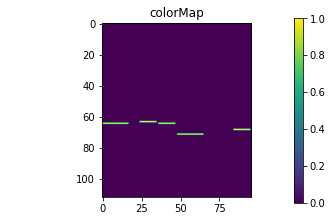

In [44]:
H = test_matrix[880].reshape(112,96) #위에 출력에서 나온 숫자 test_matrix['요기']에 적고 출력하면 나옴

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

여기부터 GAN의 구현을 해봅니다. 

In [ ]:
!pip install -q imageio

In [45]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [48]:
trainX=train_matrix.reshape((27000,112,96))
trainy=train_label2
testX=valid_matrix.reshape((7000,112,96))
testy=valid_label2
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (27000, 112, 96) (27000, 13)
Test (7000, 112, 96) (7000, 13)


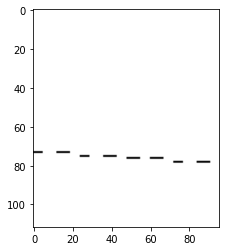

In [50]:
plt.imshow(trainX[i], cmap='gray_r')

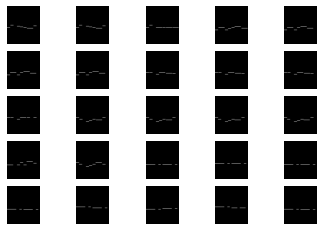

In [54]:
for i in range(25):
	# define subplot
	plt.subplot(5, 5, 1 + i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
	plt.imshow(trainX[i], cmap='gray')
plt.show()

In [78]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Reshape
from keras.optimizers import Adam
from numpy.random import randint
from numpy.random import randn
from numpy import zeros
from numpy import ones
def define_discriminator(in_shape=(112,96,1)):
	model = Sequential()
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 28 * 24
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((28, 24, 128)))
	# upsample to 56x48
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 112x96
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# generate
	model.add(Conv2D(1, (28,24), activation='tanh', padding='same'))
	return model

def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# select images
	X = dataset[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n_samples, 1))
	return X, y

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n_samples, 1))
	return X, y

In [57]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('/content/drive/My Drive/MARG/PPDDlist/generator.h5')

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = train_matrix
# train model
train(generator, discriminator, gan_model, dataset, latent_dim)

>1, 1/210, d1=0.693, d2=0.695 g=0.693
>1, 2/210, d1=0.689, d2=0.695 g=0.694
>1, 3/210, d1=0.685, d2=0.694 g=0.694
>1, 4/210, d1=0.681, d2=0.701 g=0.692
>1, 5/210, d1=0.675, d2=0.697 g=0.700
>1, 6/210, d1=0.676, d2=0.697 g=0.697
>1, 7/210, d1=0.665, d2=0.690 g=0.707
>1, 8/210, d1=0.661, d2=0.693 g=0.697
>1, 9/210, d1=0.647, d2=0.712 g=0.689
>1, 10/210, d1=0.641, d2=0.709 g=0.717
>1, 11/210, d1=0.632, d2=0.689 g=0.714
>1, 12/210, d1=0.630, d2=0.700 g=0.691
>1, 13/210, d1=0.613, d2=0.696 g=0.697
>1, 14/210, d1=0.591, d2=0.691 g=0.701
>1, 15/210, d1=0.565, d2=0.692 g=0.699
>1, 16/210, d1=0.524, d2=0.698 g=0.694
>1, 17/210, d1=0.496, d2=0.739 g=0.676
>1, 18/210, d1=0.471, d2=0.936 g=0.660
>1, 19/210, d1=0.489, d2=0.821 g=1.060
>1, 20/210, d1=0.540, d2=0.686 g=0.774
>1, 21/210, d1=0.552, d2=0.726 g=0.685
>1, 22/210, d1=0.553, d2=0.696 g=0.724
>1, 23/210, d1=0.494, d2=0.661 g=0.771
>1, 24/210, d1=0.503, d2=0.655 g=0.775
>1, 25/210, d1=0.499, d2=0.718 g=0.694
>1, 26/210, d1=0.461, d2=0.719 g=0

In [ ]:
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# create and save a plot of generated images (reversed grayscale)
def show_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	plt.show()
 
# load model
model = load_model('/content/drive/My Drive/MARG/PPDDlist/generator.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# plot the result
show_plot(X, 3)

In [ ]:
train_images=tf.convert_to_tensor(train_matrix[:,10:106,:,:],dtype='float32')
BUFFER_SIZE = 10000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(24*24*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((24, 24, 256)))
    assert model.output_shape == (None, 24, 24, 256) # 주목: 배치사이즈로 None이 주어집니다.

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 24, 24, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 48, 48, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 96, 96, 1)

    return model